Outline:

*  Generate data that is not linearly separable.   
*  Train with sigmoid neuron(sn) and see performance.
*  Write from scratch our first feed (ff) forward network. 
*  Train the ff network on the data and compare with sn. 



















#Setup

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook  # for progress bar

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs   #to generate data which is not linearly separable


In [0]:
class SigmoidNeuron:
    
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))                 #mse - mean squared error loss, ce - cross entropy loss
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
          
      m = X.shape[1]  
      self.w -= learning_rate * dw/m                           # divided by m because large no. of points involves small learning rate and vice versa hence to remove the 
                                                               #  dependency this is done
      self.b -= learning_rate * db/m                           #i.e. normalising it about the data points.
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  

  
    
  

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

red=0,yellow=1, light green =2 , dark green = 3

In [0]:
np.random.seed(0)

#Generate Data

 


*   Centres - blobs/ clusters of data
*   n_samples - no. of data points you want

*   n_features - no. of features you want (x1, x2 in that fnn model )
*   random_state - so that whatever number of times you run that, the "same" random data is generated..





In [15]:
data, labels = make_blobs(n_samples=1000,centers=4,n_features=2,random_state=0)
print(data.shape,labels.shape)

(1000, 2) (1000,)




*   data - (samples,features)
*   labels - 0,1,2,3 i.e. to which cluster the data point belongs to(here we took  4 clusters namely 0,1,2,3)



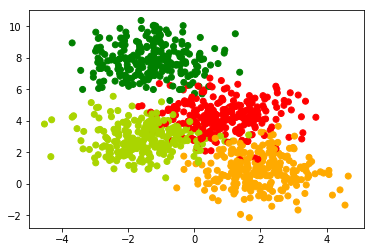

In [16]:
plt.scatter(data[:,0],data[:,1],c=labels, cmap=my_cmap)



*   labels- for each label a colour is used
*   X axis- data[:,0] i.e. data points

*   Y axis- data[:,1] i.e. features






Since there are  classes here and we want 2 classes, what we can do is combine light green with red and yellow and dark green clusters can be considered as one.  This can be done by dividing the labels by 2 and take the reminders as new labels.

In [0]:
labels_orig=labels
labels=np.mod(labels_orig,2)

Below the actual data points have been plotted.

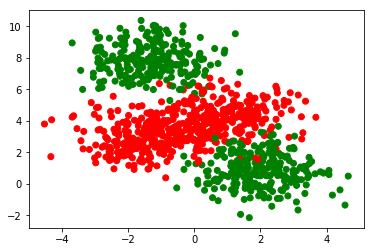

In [18]:
plt.scatter(data[:,0],data[:,1],c=labels, cmap=my_cmap)

The above data cannot be seperated by any straight line. There are only 2 classes (labels) now. Hence we can apply binary classification.

Train,test splitting. Here we will use val instead of test word.(val- validation)

In [0]:
X_train, X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)

stratify is used for maintaining equal ratio of both the labels after being split.

In [20]:
print(X_train.shape,X_val.shape,Y_train.shape,Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


#Sigmoid Neuron Classification

In [0]:
sn= SigmoidNeuron()

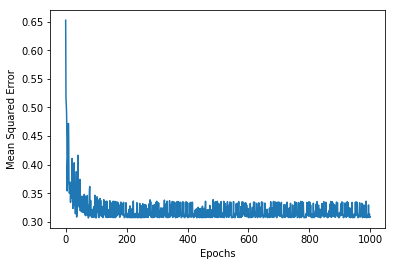

In [22]:
sn.fit(X_train,Y_train,epochs=1000,learning_rate=0.5, display_loss=True)

the lesser the learning rate, the lesser oscillations will be produced..

we wil binarise for accuracy purposes.

In [23]:
Y_pred_train=sn.predict(X_train)  #forward pass of the given input(X_train) has been done by sn.predict
Y_pred_binarised_train=(Y_pred_train>=0.5).astype("int").ravel()

Y_pred_val=sn.predict(X_val)
Y_pred_binarised_val=(Y_pred_val>=0.5).astype("int").ravel()

accuracy_train=accuracy_score(Y_pred_binarised_train,Y_train)
accuracy_val=accuracy_score(Y_pred_binarised_val,Y_val)

print("Training accuracy",round(accuracy_train,2))
print("Validation accuracy", round(accuracy_val,2))


Training accuracy 0.68
Validation accuracy 0.64


Let a=0.2356789; round(a,2) = 0.24 i.e. round offf upto 2 decimal places.

Plotting the predicted data points (train data)

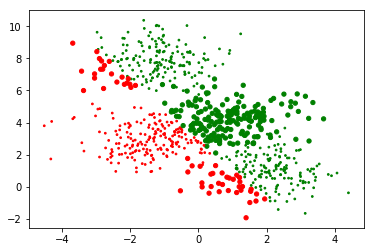

In [24]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2) this is a formula which gives size (s) of the points. If the predicted(by the model) value is equal to the actual value then the absolute difference(abs) = 0 hence s=15 x 0.2=3.
If the value doesn't match , s=15 x 1.2 (since it's abs, value is 1+0.2)=18

For accurately predicted value the points are smaller; for inaccurately predicted the dots are larger.

The above plot shows that the upper portion (small red dots) [ in the train data ] is green in actual data plot which is completely wrong.The plot (predicted by model) shows that it has seperated the whole plot into 2 sets red and green on 2 sides of the line(imaginary. You can make out it by observing carefully)

#First ff network

Check the below link for the fig. of the network..

https://s3.amazonaws.com/thinkific-import/153034/SimpleNetwork-1553058835338.png

In [0]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.randn()    #all the w's have been set to random no.s and b's as 0's
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):          #forward pass means that given input x1,x2 calculates the output y.
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1   #a1=w1*x1+w2*x2+b
    self.h1 = self.sigmoid(self.a1)                       #h1=1/(1+e^(-a1))
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1   #dw1 = cumulative change for all the inputs so far; self.dw1 is being set by the grad function
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)

#FF Network Classification

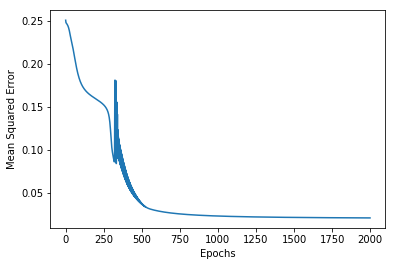

In [31]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [32]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


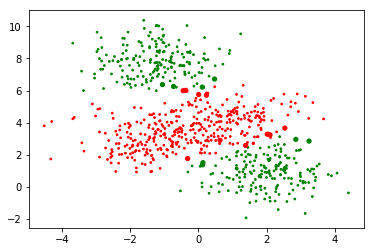

In [33]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()

This is a 4D plot. 2 sizes of dots(accuracy), colour(labels), x axis , y axis. This is very much accurate than the one we got  [using sigmoid]